# Лабораторная работа №4: Частотный анализ формул численного интегрирования

Выполнили студенты гр. 1384 Степаненко Денис Владиславович и Белокобыльский Илья Вадимович.

## Цель работы

Провести анализ частотных характеристик известных формул численного интегрирования.

## Основные теоретические положения
Квадратурные формулы для численного интегрирования::

1. формула прямоугольников:  $y_{n+1} = y_n + s_{n + \frac{1}{2}}$

2. формула трапеций: $y_{n+1}=y_n+\frac{1}{2}\left( s_n + s_{n+1} \right)$

3. формула Симпсона: $y_{n+1}=y_{n-1}+\frac{1}{3}\left( s_{n-1} + 4s_n + s_{n+1} \right)$

4. правило 3/8: $y_{n+2} = y_{n-1} + \frac18(s_{n+2} + 3s_{n+1} + 3x_n + s_{n-1})$

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики $\tilde H(f).$ Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул.

## Выполнение работы
Подготовим необходимые функции для построения графиков.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

start = -0.5
end = 0.5
space_num = 1000


def plot_function(f: callable, show=True, label=None):
    def insert(x, y, pos, value):
        return np.insert(x, pos, value), np.insert(y, pos, value)

    X = np.linspace(start, end, space_num)
    Y = f(X)
    X, Y = insert(X, Y, space_num // 6 + 1, None)
    X, Y = insert(X, Y, space_num // 2 + 1, None)
    X, Y = insert(X, Y, space_num // 2 + 2 + space_num // 3, None)
    plt.plot(X, Y, label=label)
    if label:
        plt.legend()
    if show:
        plt.show()


def plot_list(funcs: list[callable], ymin, ymax, labels=None):
    plt.grid()
    plt.ylim(ymin, ymax)
    for i in range(len(funcs)):
        label = None if labels is None else labels[i]
        plot_function(funcs[i], show=i == len(funcs) - 1, label=label)


def imag(fs):
    im = lambda f: lambda x: np.imag(f(x))
    return [im(f) for f in fs]

### Пункт 1
Выведем формулы передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона.

**1) Формула прямоугольников: $y_{n+1} = y_n + s_{n + \frac{1}{2}}, y_0=0$**

Пусть $s_n=e^{i\omega n}, y_n = H(\omega)e^{i\omega n}$

Тогда
$\left\{ \begin{array}{cl}
y_{n+1}= H(\omega)e^{i\omega n} + \left( e^{i\omega (n+\frac{1}{2})}\right) \\
y_{n+1}= H(\omega)e^{i\omega(n+1)}
\end{array} \right.$

$H(\omega)e^{i\omega(n+1)} = H(\omega)e^{i\omega n} + \left( e^{i\omega (n+\frac{1}{2})}\right)|:e^{i\omega n}$

$H(\omega)e^{i\omega} - H(\omega) =  e^{\frac{i\omega}{2}}$

$H(\omega)=\frac{ e^{\frac{i\omega}{2}}}{\left( e^{i\omega}-1 \right)}=\frac{1}{e^{\frac{i\omega}{2}}-e^{-\frac{i\omega}{2}}}=\frac{1}{2i \cdot sin\left( \frac{\omega}{2} \right)}$

Т.к. $\omega = 2\pi f$ получаем:

$\tilde H(f)=\frac{1}{2i \cdot sin\left( \pi f \right)}$

Точное значение:
$\int e^{i\omega t}dt=\frac{e^{i\omega t}}{i\omega}$

Отношение вычесленного значения к истинному:
$\gamma = \frac{i\omega}{2i \cdot sin\left( \frac{\omega}{2} \right)} = \frac{\left( \frac{\omega}{2} \right)}{sin\left( \frac{\omega}{2} \right)}$




**2) Формула трапеций: $y_{n+1}=y_n+\frac{1}{2}\left( s_n + s_{n+1} \right), y_0=0$**

Пусть $s_n=e^{i\omega n}, y_n = H(\omega)e^{i\omega n}$

Тогда
$\left\{ \begin{array}{cl}
y_{n+1}= H(\omega)e^{i\omega n} + \frac{1}{2} \left( e^{i\omega n} + e^{i\omega(n+1)} \right) \\
y_{n+1}= H(\omega)e^{i\omega(n+1)}
\end{array} \right.$

$H(\omega)e^{i\omega(n+1)} = H(\omega)e^{i\omega n} + \frac{1}{2} \left( e^{i\omega n} + e^{i\omega(n+1)} \right)|:e^{i\omega n}$

$H(\omega)e^{i\omega} - H(\omega) = \frac{1}{2} \left( 1 + e^{i\omega} \right)$

$H(\omega)=\frac{\left( e^{i\omega}+1 \right)}{2\left( e^{i\omega}-1 \right)}=\frac{cos\left( \frac{\omega}{2} \right)}{2isin\left( \frac{\omega}{2} \right)}$

Т.к. $\omega = 2\pi f$ получаем:

$\tilde H(f)=\frac{cos\left( \pi f \right)}{2isin\left( \pi f \right)}$

Точное значение:
$\int e^{i\omega t}dt=\frac{e^{i\omega t}}{i\omega}$

Отношение вычесленного значения к истинному:
$\gamma = \frac{i\omega \cdot cos\left( \frac{\omega}{2} \right)}{2i \cdot sin\left( \frac{\omega}{2} \right)} = cos\left( \frac{\omega}{2} \right)\frac{\left( \frac{\omega}{2} \right)}{sin\left( \frac{\omega}{2} \right)}$


**3) Формула Симпсона:** $y_{n+1}=y_{n-1}+\frac{1}{3}\left( s_{n-1} + 4s_n + s_{n+1} \right), y_0=0$

Пусть $s_n=e^{i\omega n}, y_n = H(\omega)e^{i\omega n}$

Тогда
$\left\{ \begin{array}{cl}
y_{n+1}= H(\omega)e^{i\omega (n-1)} + \frac{1}{3} \left( e^{i\omega (n-1)} + 4e^{i\omega n} + e^{i\omega(n+1)} \right) \\
y_{n+1}= H(\omega)e^{i\omega(n+1)}
\end{array} \right.$

$H(\omega)e^{i\omega(n+1)} = H(\omega)e^{i\omega (n-1)} + \frac{1}{3} \left(e^{i\omega (n-1)} + 4e^{i\omega n} + e^{i\omega(n+1)} \right)|:e^{i\omega n}$

$H(\omega)e^{i\omega} - H(\omega)e^{-i\omega} = \frac{1}{3} \left( e^{-i\omega} + 4 + e^{i\omega} \right)$

$H(\omega)=\frac{\frac{1}{3} \left( e^{-i\omega} + 4 + e^{i\omega} \right) }{\left( e^{i\omega}-e^{-i\omega} \right)}= \frac{4+2cos(\omega)}{6sin(\omega)}=\frac{2+cos(\omega)}{3sin(\omega)}$

Т.к. $\omega = 2\pi f$ получаем:

$\tilde H(f)=\frac{2+cos(2\pi f)}{3sin(2\pi f)}$

Точное значение:
$\int e^{i\omega t}dt=\frac{e^{i\omega t}}{i\omega}$

Отношение вычесленного значения к истинному:
$\gamma = \frac{i\omega \cdot \left( 2+cos(\omega) \right)}{3i \cdot sin(\omega)} = \frac{\omega \left( 2 + cos(\omega)\right)}{3 sin(\omega)}$

**Построим графики передаточных функций и графики отношения вычисляемого в результате фильтрации значения к истинному:**

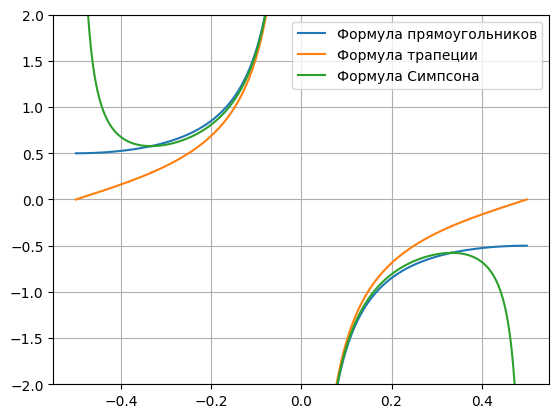

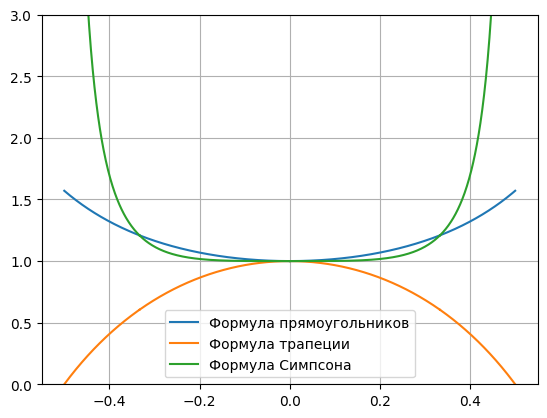

In [2]:
H_rectangle = lambda f: 1 / (2j * np.sin(np.pi * f))
H_trapezoid = lambda f: np.cos(np.pi * f) / (2j * np.sin(np.pi * f))
H_simpson = lambda f: (2 + np.cos(2 * np.pi * f)) / (3j * np.sin(2 * np.pi * f))

plot_list(
    imag([H_rectangle, H_trapezoid, H_simpson]),
    ymin=-2, ymax=2,
    labels=['Формула прямоугольников', 'Формула трапеции', 'Формула Симпсона'],
)

gamma_rectangle = lambda f: np.pi * f / (np.sin(np.pi * f))
gamma_trapezoid = lambda f: np.cos(np.pi * f) * np.pi * f / (np.sin(np.pi * f))
gamma_simpson = lambda f: (2 + np.cos(2 * np.pi * f)) / 3 * 2 * np.pi * f / (np.sin(2 * np.pi * f))
plot_list(
    [gamma_rectangle, gamma_trapezoid, gamma_simpson],
    ymin=0, ymax=3,
    labels=['Формула прямоугольников', 'Формула трапеции', 'Формула Симпсона'],
)

По графикам видно что для:

**1) Формулы Симпсона** примерно до $f=0.2$ значение сигнала сохраняется, далее резко усиливаются высокие составляющие потому что  метод опирается на полиномиальную интерполяцию, которая не может точно воспроизводить высокочастотные колебания.

**2) Формулы прямоугольников** характерно сохранение низких частот (в окрестности 0) сигналов, усиление высоких частот.

**3) Формулы трапеции** низкие частоты не изменяются, а на более высоких частотах происходит подавление.  Это связано с тем, что метод усредняет значения функции, что может привести к потере информации о быстрых изменениях.

#Пункт 2.
## Пункт 2
Вывести формулу передаточной функции рекурсивного фильтра для интегрирования «по правилу 3/8»: $y_{n+2} = y_{n-1} + \frac18(x_{n+2} + 3x_{n+1} + 3x_n + x_{n-1})$. Построить график передаточной функции и график отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства передаточной функции.


Выведем формулу для передаточной функции:
$y_{n+2} = y_{n-1} + \frac18(s_{n+2} + 3s_{n+1} + 3x_n + s_{n-1})$

$s_n=e^{i \omega n}$, $y_n=H(\omega)\cdot e^{i\omega n}$

Следовательно,
$ \left\{ \begin{array}{cl}
y_{n+2} = H(\omega)\cdot e^{i\omega (n-1)} + \frac{1}{8} \left(e^{i\omega (n+2)} +3e^{i \omega (n+1)}+3e^{i\omega n}+e^{i \omega (n-1)} \right) \\
y_{n+2} = H(\omega)\cdot e^{i\omega (n+2)}
\end{array} \right. \Rightarrow $
$ H(\omega)\cdot e^{i\omega (n+2)} = H(\omega)\cdot e^{i\omega (n-1)} + \frac{1}{8} \left(e^{i\omega (n+2)} +3e^{i \omega (n+1)}+3e^{i\omega n}+e^{i \omega (n-1)} \right) \Rightarrow $
$ H(\omega) = \frac{e^{2i\omega}+3e^{i\omega}+3+e^{-i\omega}}{8\cdot \left(e^{2i\omega}-e^{-i\omega}\right)} = \frac{\cos\left(\frac{3\omega}{2}\right) +3 \cos\left(\frac{\omega}{2}\right)}{8i\cdot \sin\left(\frac{3\omega}{2}\right)} $

Получим формулу передаточной функции:

$ \tilde{H}=\frac{\cos(3\pi f) +3 \cos(\pi f)}{8i\cdot \sin(3 \pi f)} $

И отношение вычисленного значения к истинному:

$ \gamma = i\omega \frac{\cos\left(\frac{3\omega}{2}\right) +3 \cos\left(\frac{\omega}{2}\right)}{8i\cdot \sin\left(\frac{3\omega}{2}\right)}= \frac{\cos\left(\frac{3\omega}{2}\right) +3 \cos\left(\frac{\omega}{2}\right)}{12} \cdot \frac{3\omega}{2\cdot \sin\left(\frac{3\omega}{2}\right)} \Rightarrow $

$ \gamma = \frac{\cos(3\pi f) +3 \cos(3\pi f)}{12} \cdot \frac{3\pi f}{\cdot \sin(3\pi f)} $.

На основе полученных формул построим графики. Для передаточной функции возьмем комплексную составляющую, так как вещественная равна нулю.

График передаточной функции:

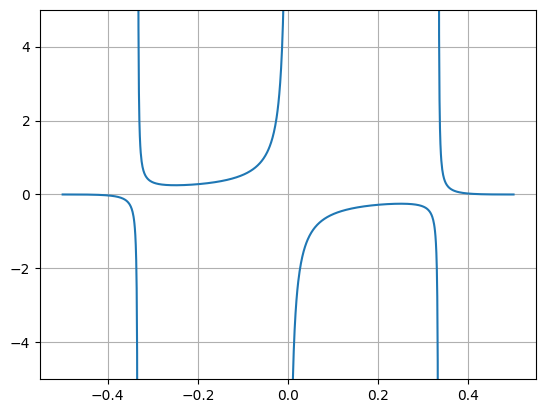

In [4]:
H_3_8 = lambda f: (np.cos(3 * np.pi * f) + 3 * np.cos(np.pi * f)) / (8j * np.sin(3 * np.pi * f))
gamma_3_8 = lambda f: 1 / 12 * (np.cos(3 * np.pi * f) + 3 * np.cos(np.pi * f)) * 3 * np.pi * f / (np.sin(3 * np.pi * f))
plot_list(imag([H_3_8]), ymin=-5, ymax=5)

График отношения вычисляемого значения к истинному:

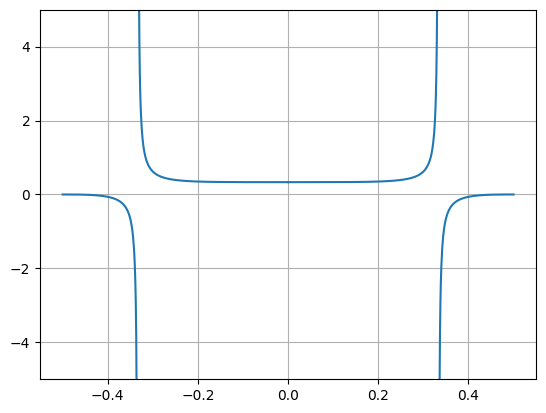

In [5]:
plot_list([gamma_3_8], ymin=-5, ymax=5)

По графикам можно сказать, что частоты в окрестностях точек $\frac{1}{3}$ и -$\frac{1}{3}$ усиливаются. В отсальных случаях происходит небольшое подавление частот, бо́льшие частоты подвергаются бо́льшему подавлению.

###  Пункт 3.

Проведем сопоставительный анализ частотных характеристик передаточных функций, полученных в ходе выполнения пунктов 1 и 2.

Все фильтры, рассмотренные в рамках лабораторной работы, за исключением 3/8 сохраняют низкие частоты, 3/8 подавляет низкие частоты в 0.2 раза.

Фильтры, соответствующие формулам прямоугольника, Симпсона и 3/8, усиливают высокие частот: 3/8 резко усиливает в правой и слевой полуокрестностях точек $\pm \frac{1}{3}$ соответсвенно, Симпсон усиливает быстрее прамоугольника. Фильтр по формуле трапеции подавляет высокие частоты, как и 3/8 в левой и правой полуокрестностях точек $\pm \frac{1}{3}$ соответсвенно.

## Выводы

В ходе лабораторной работы был проведен анализ частотных свойств четырех рекурсивных фильтров, основанных на формулах численного интегрирования: прямоугольника, трапеции, Симпсона, по правилу $\frac{3}{8}$. Для этого были выведены формулы их передаточных функций, а также отношение $\gamma = \frac{выч\ знач}{ист\ знач}$, демонстрирующее как изменяется полученный сигнал в сравнении с исходным. По полученным функциям были построены графики, отражающие поведение фильтров.

Далее был проведен сравнительный анализ всех методов, который показал, что у каждого есть свои плюсы и минусы, что выбор фильтра существенно влияет на частотные характеристики обрабатываемого сигнала и поэтому подбирается специально под поставленную задачу. В целом, результаты работы расширили понимание поведения формул численного интегрирования в том числе и их ошибок, а также понимание работы рекурсивных фильтров в ЦОС.  